Консольная визуализация

In [14]:
import numpy as np
count = []
# Задаем лабиринт как матрицу
labyrinth = np.array([
    [0, 0, 1, 1, 1],
    [0, 1, 0, 1, 0],
    [0, 1, 0, 0, 0],
    [0, 1, 0, 1, 0],
    [0, 0, 0, 1, 0]
])

# Определим стартовое положение агента и конечное положение которое будет считаться его конечной целью
start_pos = (0, 0)
goal_pos = (4, 4)

# Определим возможные варианты действия агента
actions = ['up', 'down', 'left', 'right']

# Инициализируем Q-таблицу
q_table = np.zeros((labyrinth.shape[0], labyrinth.shape[1], len(actions)))

# Параметры обучения
learning_rate = 0.05
discount_factor = 0.5
exploration_rate = 0.8
max_episodes = 1000

# Цикл обучения агента
for episode in range(max_episodes):
    # Положение агента
    current_pos = start_pos
    done = False

    # Output variables
    agent_path = [current_pos]
    agent_visualization = labyrinth.copy()
    agent_visualization[current_pos] = 2  # Mark agent's starting position

    while not done:
        # Условие остановки цикла
        if np.random.uniform() < exploration_rate:
            action = np.random.choice(actions)
        else:
            action = actions[np.argmax(q_table[current_pos])]

        # Подвигаем агента
        if action == 'up':
            next_pos = (current_pos[0] - 1, current_pos[1])
        elif action == 'down':
            next_pos = (current_pos[0] + 1, current_pos[1])
        elif action == 'left':
            next_pos = (current_pos[0], current_pos[1] - 1)
        elif action == 'right':
            next_pos = (current_pos[0], current_pos[1] + 1)

        if next_pos == goal_pos:
            reward = 10  # Успех
            done = True
        elif next_pos[0] < 0 or next_pos[0] >= labyrinth.shape[0] or next_pos[1] < 0 or next_pos[1] >= labyrinth.shape[1] or labyrinth[next_pos] == 1:
            reward = -20  # Врезался в стену
            next_pos = current_pos  # Остался на месте
        else:
            reward = -3  # Пустая клетка

        # Обновление таблицы
        q_table[current_pos + (actions.index(action),)] += learning_rate * (
                    reward + discount_factor * np.max(q_table[next_pos]) - q_table[
                current_pos + (actions.index(action),)])

        current_pos = next_pos
        agent_path.append(current_pos)
        agent_visualization[current_pos] = 2  # Mark agent's current position

    # Console visualization of agent's path
    print("Episode:", episode + 1)
    for row in agent_visualization:
        row_symbols = ['S' if cell == 2 else 'X' if cell == 1 else ' ' for cell in row]
        print("|".join(row_symbols))
        print("-" * (2 * labyrinth.shape[1] - 1))
    print("Agent's path:", agent_path)
    print()
    count.append(len(agent_path))

# Final console visualization of the agent's path
print("Final Path:")
for row in agent_visualization:
    row_symbols = ['S' if cell == 2 else 'X' if cell == 1 else ' ' for cell in row]
    print("|".join(row_symbols))
    print("-" * (2 * labyrinth.shape[1] - 1))
print("Agent's path:", agent_path)


Episode: 1
S|S|X|X|X
---------
S|X|S|X|S
---------
S|X|S|S|S
---------
S|X|S|X|S
---------
S|S|S|X|S
---------
Agent's path: [(0, 0), (0, 0), (1, 0), (1, 0), (0, 0), (1, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 1), (0, 1), (0, 1), (0, 0), (0, 1), (0, 0), (1, 0), (1, 0), (0, 0), (0, 1), (0, 1), (0, 1), (0, 0), (0, 0), (1, 0), (1, 0), (2, 0), (2, 0), (3, 0), (2, 0), (2, 0), (2, 0), (1, 0), (2, 0), (3, 0), (3, 0), (4, 0), (4, 0), (4, 1), (4, 1), (4, 2), (4, 2), (3, 2), (2, 2), (1, 2), (1, 2), (2, 2), (3, 2), (3, 2), (3, 2), (2, 2), (3, 2), (3, 2), (3, 2), (4, 2), (4, 1), (4, 1), (4, 2), (3, 2), (4, 2), (3, 2), (2, 2), (2, 2), (3, 2), (3, 2), (4, 2), (4, 2), (4, 2), (4, 1), (4, 0), (4, 0), (4, 0), (3, 0), (4, 0), (3, 0), (2, 0), (1, 0), (1, 0), (1, 0), (2, 0), (1, 0), (1, 0), (0, 0), (0, 1), (0, 1), (0, 1), (0, 1), (0, 0), (0, 1), (0, 1), (0, 1), (0, 0), (0, 0), (1, 0), (2, 0), (1, 0), (1, 0), (2, 0), (2, 0), (3, 0), (2, 0), (2, 0), (1, 0), (0, 0), (0, 1), (0, 0), (0, 0), (1, 0), (2, 0), (2

Путь агента будет отображаться с помощью символов 'S', стены в лабиринте будут представлены символами 'X', а пустые пространства будут отображаться как пустые места. Путь агента также будет распечатан в виде списка координат.

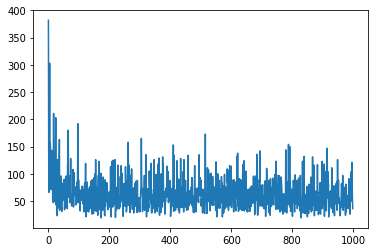

In [15]:
import matplotlib.pyplot as plt   
x = []
y = []
for i in range (0, len(count)):
    x.append(i)
for i in range (0, len(count)):
    y.append(count[i])

plt.plot(x,y)

